In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def analyze_file(filename):
    df = pd.read_csv(filename, sep='\t', skiprows=1, dtype=float)
    df['x'] *= 0.22
    df['y'] *= 0.22
    df['vx'] = np.diff(df['x'], prepend=0) / np.diff(df['t'], prepend=1)
    df['vy'] = np.diff(df['y'], prepend=0) / np.diff(df['t'], prepend=1)
    df['vx'][0] = 0.
    df['vy'][0] = 0.
    df['v_sq'] = df['vx'] ** 2 + df['vy'] ** 2
    return df

# Matrise med t, x, y, vx, vy, v_sq som første dim.
df = np.asarray(pd.concat([analyze_file(os.path.join('data', file)) for file in os.listdir('data')])).T


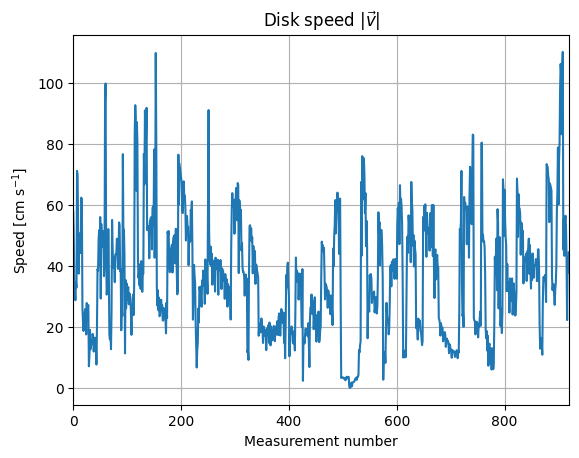

In [4]:
plt.plot(np.sqrt(df[-1])[df[-1]!=0.])
plt.xlabel('Measurement number')
plt.ylabel('Speed [cm s$^{-1}$]')
plt.title(r'Disk speed |$\vec{v}$|')
plt.xlim(0, 920)
plt.grid()
plt.show()

0.027447637766968885


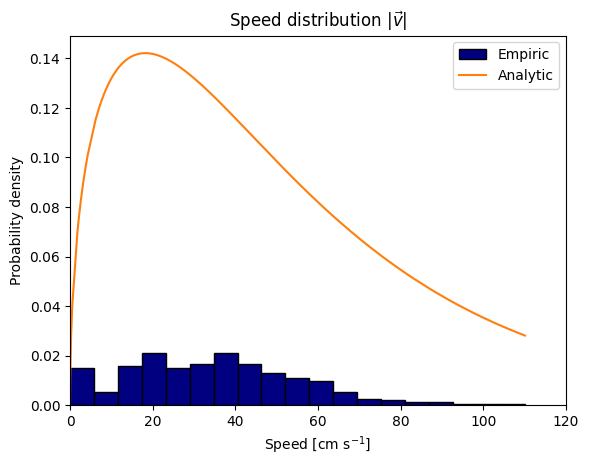

In [16]:
def speed_distr_analytic(v_sq):
    B = 1. / np.average(v_sq)
    return 2. * B * np.sqrt(v_sq) * np.exp(-B * v_sq)

plt.hist(np.sqrt(df[-1]), bins=np.linspace(0, 110, 20), density=True, fc='navy', ec='k', label='Empiric')
plt.plot(speed_distr_analytic(np.arange(121)), label='Analytic')
plt.xlim(0, 120)
plt.xlabel('Speed [cm s$^{-1}$]')
plt.ylabel('Probability density')
plt.title(r'Speed distribution |$\vec{v}$|')
plt.legend()
plt.show()

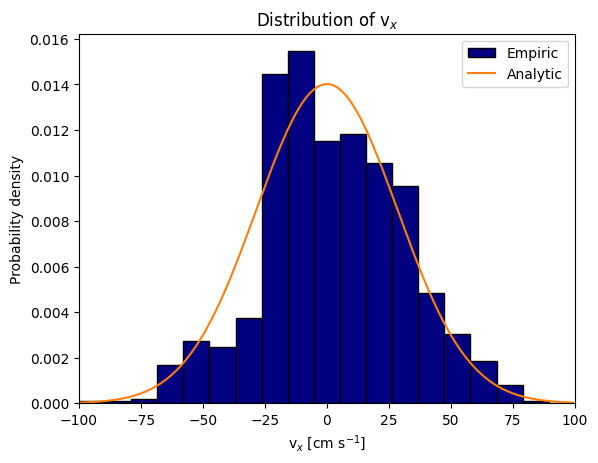

In [6]:
def component_prob(v_comp, B):
    return np.sqrt(B / np.pi) * np.exp(-B * v_comp ** 2)

plt.hist(df[3], density=True, bins=np.linspace(-100, 100, 20), fc='navy', ec='k', label='Empiric')
plt.plot(np.arange(-100, 100), component_prob(np.arange(-100, 100), B=1./np.average(df[-1])), label='Analytic')
plt.xlabel('v$_x$ [cm s$^{-1}$]')
plt.ylabel('Probability density')
plt.title('Distribution of v$_x$')
plt.xlim(-100, 100)
plt.legend()
plt.show()

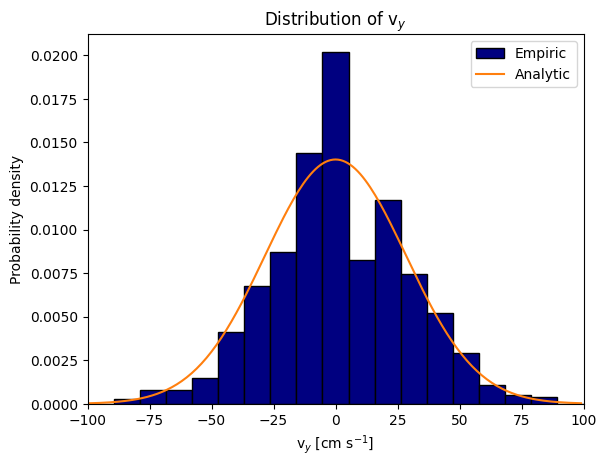

In [7]:
plt.hist(df[4], density=True, bins=np.linspace(-100, 100, 20), fc='navy', ec='k', label='Empiric')
plt.plot(np.arange(-100, 100), component_prob(np.arange(-100, 100), B=1./np.average(df[-1])), label='Analytic')
plt.xlabel('v$_y$ [cm s$^{-1}$]')
plt.ylabel('Probability density')
plt.title('Distribution of v$_y$')
plt.xlim(-100, 100)
plt.legend()
plt.show()

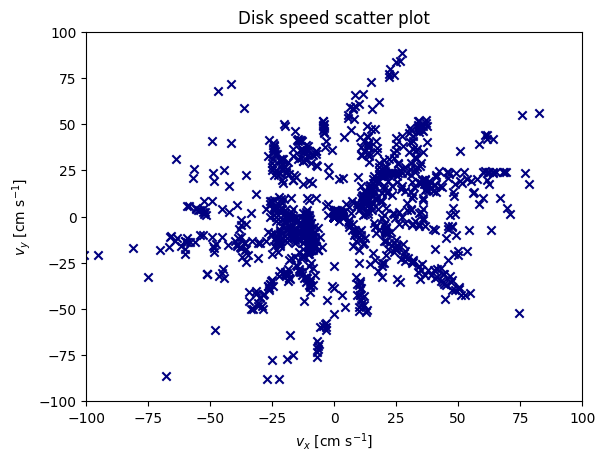

In [8]:
plt.scatter(df[3], df[4], marker='x', color='navy')
plt.xlim(-100, 100)
plt.ylim(-100, 100)
plt.xlabel('$v_x$ [cm s$^{-1}$]')
plt.ylabel('$v_y$ [cm s$^{-1}$]')
plt.title('Disk speed scatter plot')
plt.show()

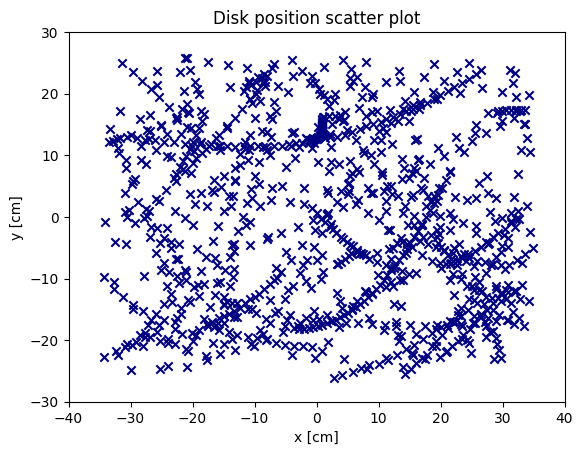

In [9]:
plt.scatter(df[1], df[2], marker='x', color='navy')
plt.xlim(-40, 40)
plt.ylim(-30, 30)
plt.xlabel('x [cm]')
plt.ylabel('y [cm]')
plt.title('Disk position scatter plot')
plt.show()

In [10]:
disk_mass = 32.  # [g]
temp = 300.      # [K]
k_p = disk_mass * np.average(df[-1]) / (temp * 2.)
print(f'k_p = {k_p:.2f} g cm^2 K^-1')

k_p = 86.38 g cm^2 K^-1


In [11]:
v_avg = np.average(np.sqrt(df[-1]))
v_rms = np.sqrt(np.average(df[-1]))
err = v_avg / v_rms - np.sqrt(np.pi) / 2.
print(f'Absolute error = {np.abs(err):.2%}')

Absolute error = 2.67%


The scatter plots do not show any indication of trends. If v_x and v_y are independent random variables, they should be normally distributed as seen in the histograms. Comparing with empirical values:

In [12]:
print(f'v_x average = {np.average(df[3]):.2f} cm s^-1')
print(f'v_y average = {np.average(df[4]):.2f} cm s^-1')

v_x average = 2.03 cm s^-1
v_y average = 1.68 cm s^-1


We see that these values does not equal zero. We can expect the disks to move somewhat towards the upper right corner